In [11]:
from __future__ import print_function, division
import scipy
from keras.models import load_model
import matplotlib.pyplot as plt
import sys
import numpy as np
import os
import keras
import pandas as pd

from keras.datasets import mnist
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Concatenate
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
import datetime
import matplotlib.pyplot as plt
import sys
from data_loader import DataLoader
import numpy as np
import os
import cv2
import pylab 


In [39]:
def load_img(path):
        img = cv2.imread(path)
        img = cv2.resize(img, (256, 256))
        img = img/127.5 - 1.
        return img
    
    
def show_images(images, cols = 1, titles = None, save_fig = "default"):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    #fig.set_title("Samples of infected red blood cells")
    
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        plt.axis("off")
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.savefig('{}'.format(save_fig), dpi=50)
    plt.show()

In [2]:
#Root directory of the project
ROOT_DIR = os.path.abspath(".")
MODEL_PATH = os.path.join(ROOT_DIR, "saved_model")
TEST_IMAGES = os.path.join(ROOT_DIR, "test_imgs")
g_AB = load_model(os.path.join(MODEL_PATH, 'g_AB.h5'), custom_objects={'InstanceNormalization':InstanceNormalization})
#print(g_AB.summary())

W0711 23:56:12.822480 140594683168512 deprecation_wrapper.py:119] From /home/hasib/anaconda3/envs/ieee/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0711 23:56:13.268059 140594683168512 deprecation_wrapper.py:119] From /home/hasib/anaconda3/envs/ieee/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0711 23:56:13.568153 140594683168512 deprecation_wrapper.py:119] From /home/hasib/anaconda3/envs/ieee/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.

W0711 23:56:14.080032 140594683168512 deprecation_wrapper.py:119] From /home/hasib/anaconda3/envs/ieee/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default

In [3]:
TEST_IMAGES

'/home/hasib/raw2syn/test_imgs'

In [5]:
img_paths = os.listdir(TEST_IMAGES)

In [30]:
x_test = []
x_test_raw = []

for p in img_paths[:30]:
    # Load an image from domain A
    img = load_img("{}/{}".format(TEST_IMAGES, p))
    x = cv2.imread("{}/{}".format(TEST_IMAGES, p))
    x = cv2.resize(x, (450, 50))
    x_test_raw.append(x)
    
    print(img.shape)
    # Make it 4D for inference
    img_4d = np.expand_dims(img, axis=0)

    # Generate domain B image
    syn_img = g_AB.predict(img_4d)
    # Make it 3D
    img_B = np.squeeze(syn_img, axis=0)
    img_B = cv2.resize(img_B, (450, 50))

    # Rescale images 0 - 1
    img_B = 0.5 * img_B + 0.5
    x_test.append(img_B)
    img_B = None
    img = None


(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


In [31]:
x_test = np.array(x_test)
x_test_raw = np.array(x_test_raw)
x_test.shape, x_test_raw.shape

((30, 50, 450, 3), (30, 50, 450, 3))

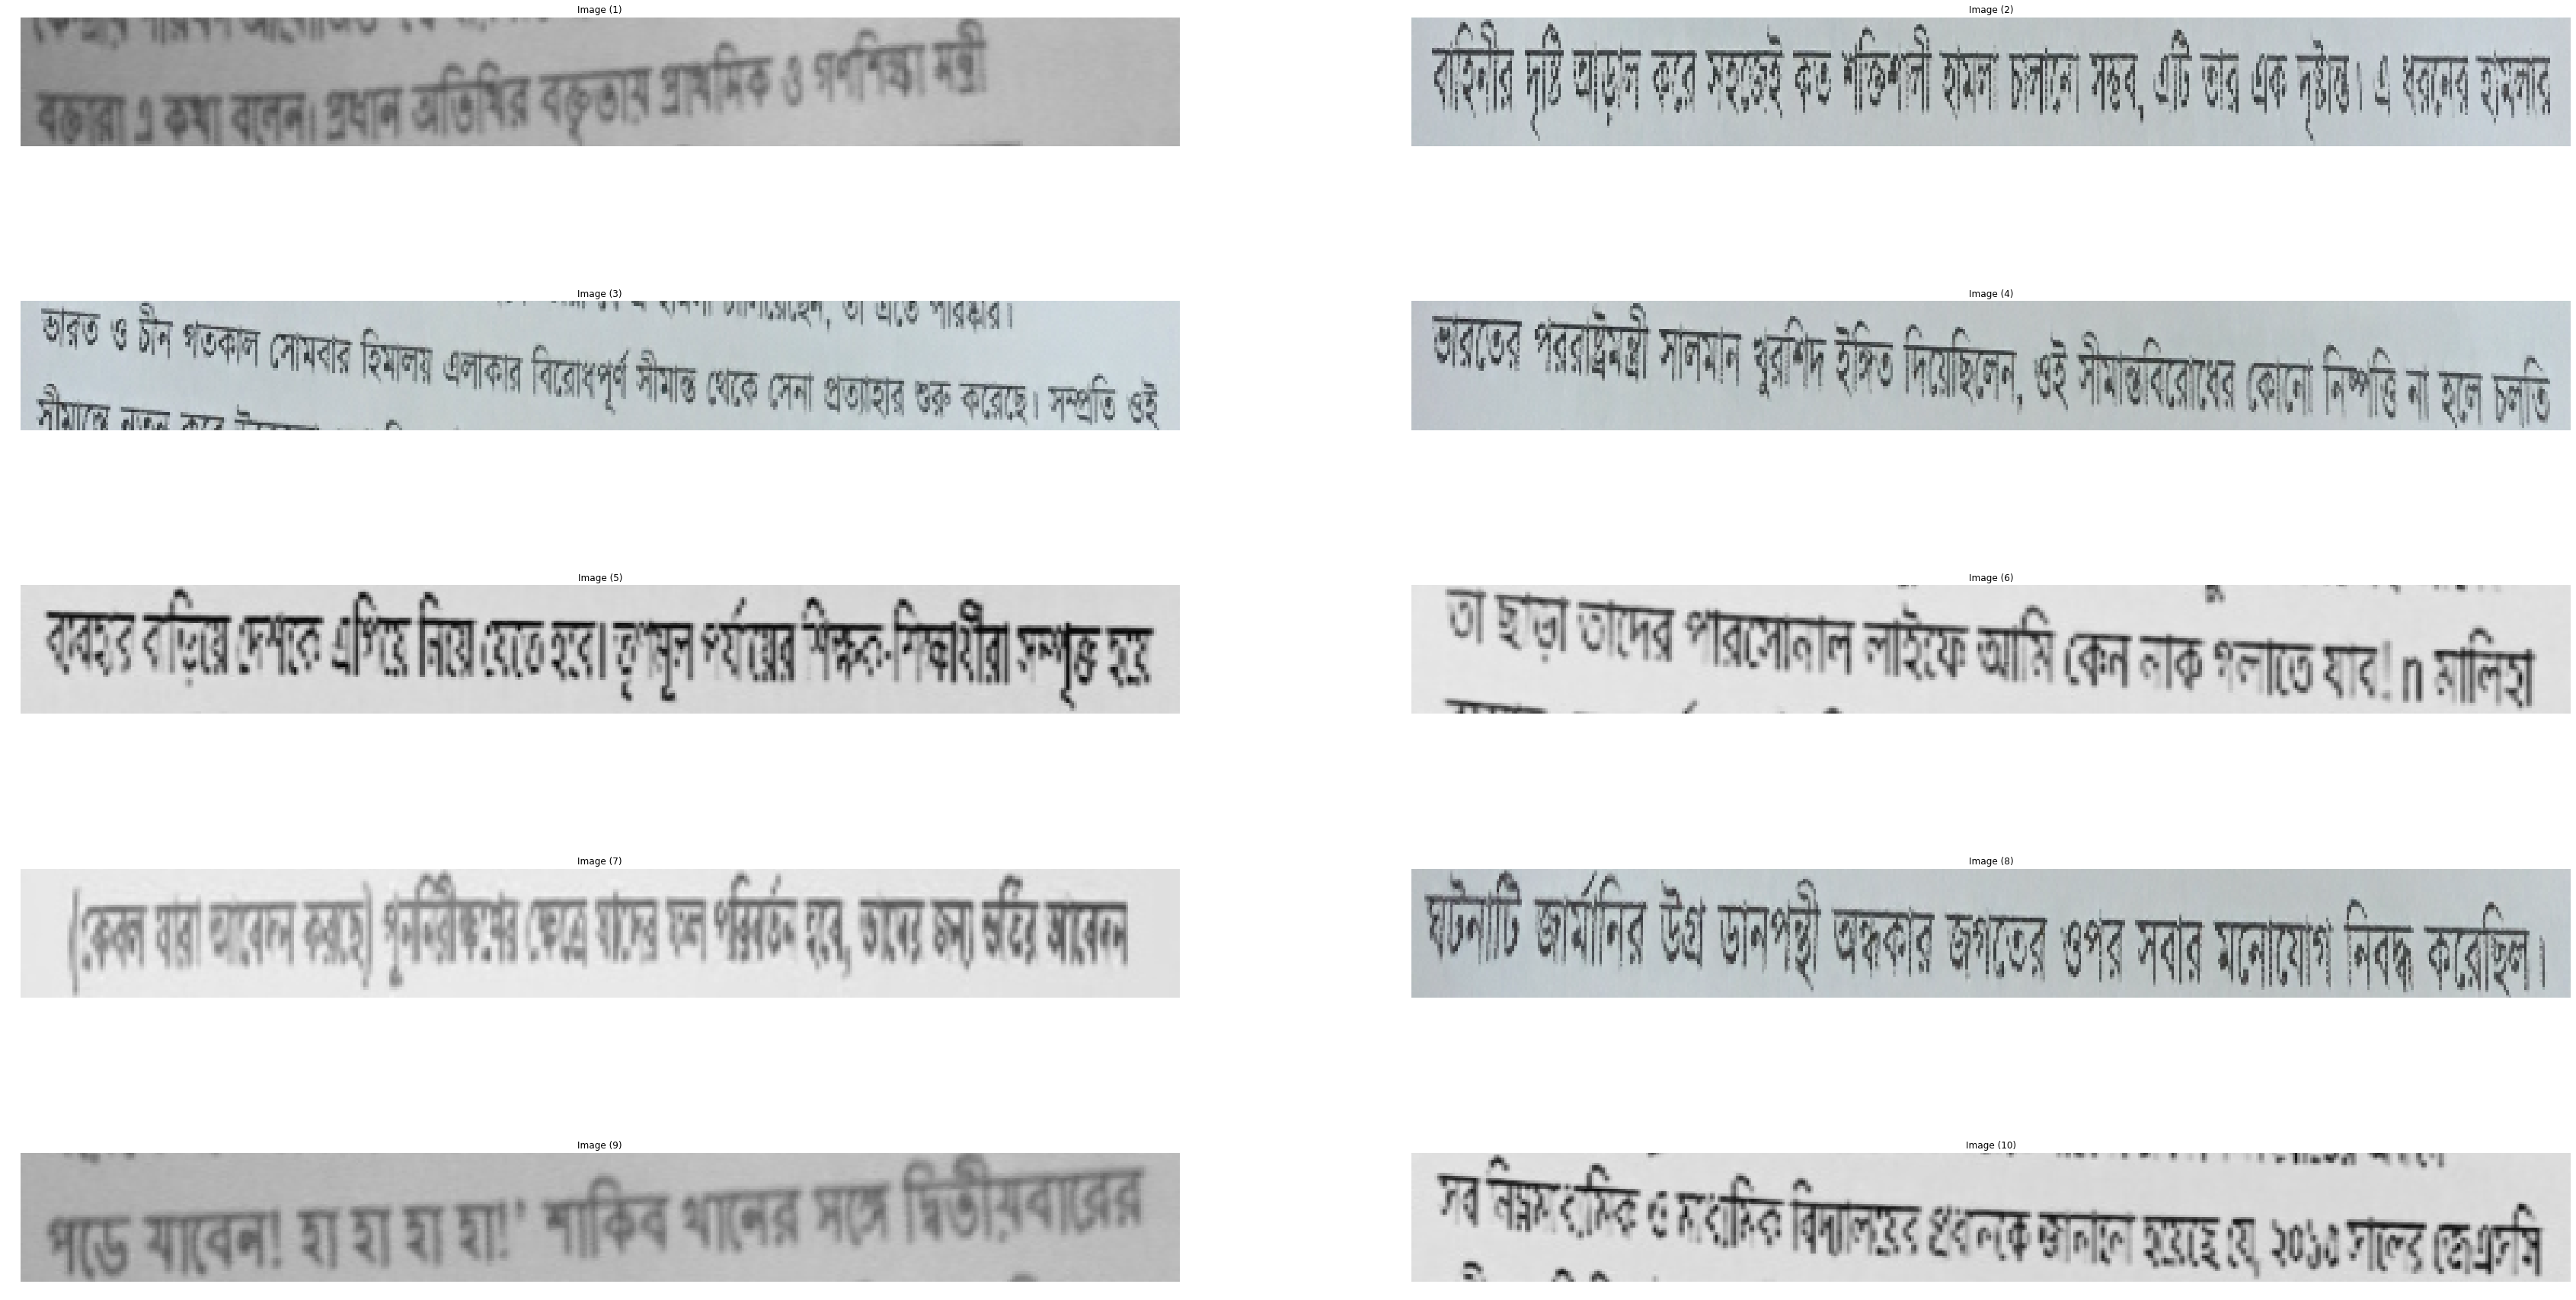

In [40]:
show_images(x_test_raw[:10], cols = 6, titles = None, save_fig="Domain A")

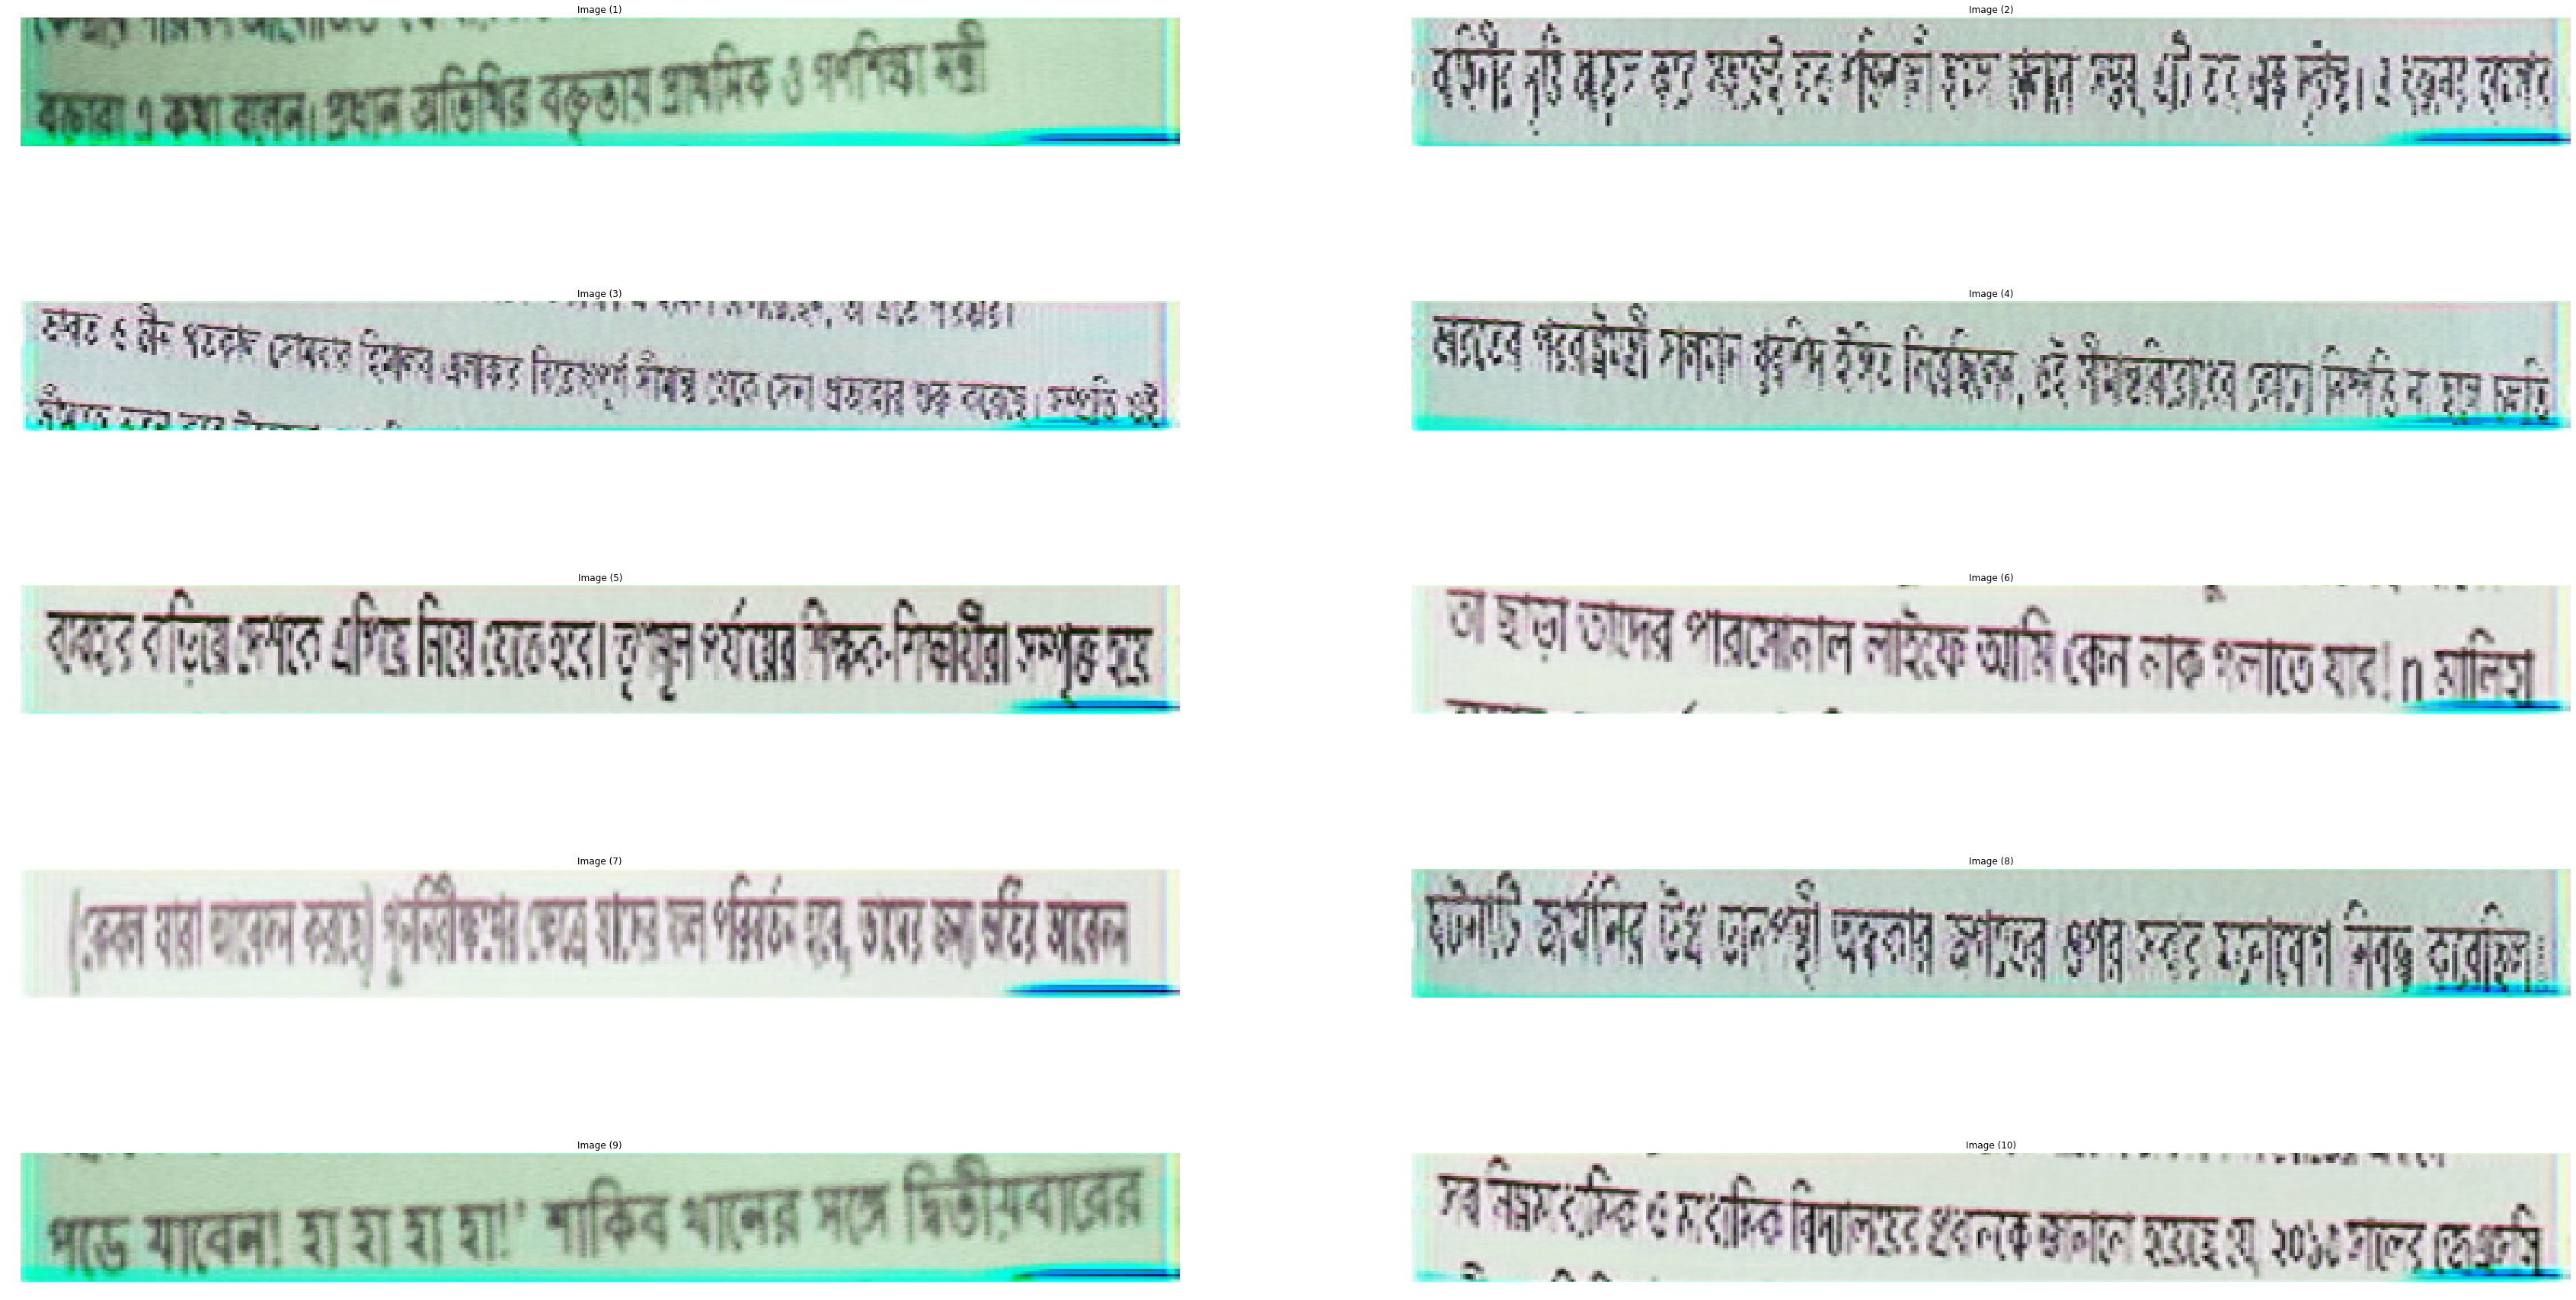

In [41]:
show_images(x_test[:10], cols = 6, titles = None, save_fig="Domain B")